## Machine Learning - Recommender System

I will be creating items similarity basic recommendation system for movies.

**this is not a true robust recommendation system**

It just tells you what movies/items are most similar to your movie choice

### Import Libraries

In [1]:
# starting with importing libariraies 

import numpy as np
import pandas as pd

In [2]:
# importing data visualization libraries 

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Get the data 

I will create artificial data to use in this project

In [3]:
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [4]:
# it's going to be a tab-separated file, so I will sep argument

df = pd.read_csv('u.data', sep='\t', names=columns_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


when checking our dataset, we notice that 'item_id' is only numbers, while it should be movies' titles
so I will create a variable named 'movie_titels' and replace its values with values in 'item_id'.

In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [7]:
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [8]:
# now we replace them 

df = pd.merge(df, movie_titles, on='item_id')

In [9]:
df

# now we notice a new column named 'title' matching with the 'item_id' values

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


### EDA

now let's explore the data a bit and get a look at some of the best-rated movies.

In [10]:
sns.set_style('white')

In [11]:
# create a rating data frame with an average rating and number of ratings


df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

Now I have the average rating for every title by grouping everything by its title, and what we can additionally do is to sort values with 'ascending=False' to show high values on top 

In [12]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

# we notice high rating values are shown on top

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

top rating does not need many people have watched the movie and gave it a good rating, it could be one or two persons only

so let's try to find the movies with the most ratings 

In [13]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [14]:
# now we put these results we got into a dataframe 

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [15]:
ratings

# now we check our new dataframe

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


**N: Notice that we already know that ratings do not reflect number of ratings, so we will add number of ratings column to our dataframe**

In [16]:
ratings['ratings_num'] = df.groupby('title')['rating'].count()


In [17]:
ratings

# now we should find 'ratings_num' column added to our data frame

,rating,ratings_num
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


after we finished arranging and filtering our data frame, it is time to plot the data and visualize what the data could show us

<Axes: >

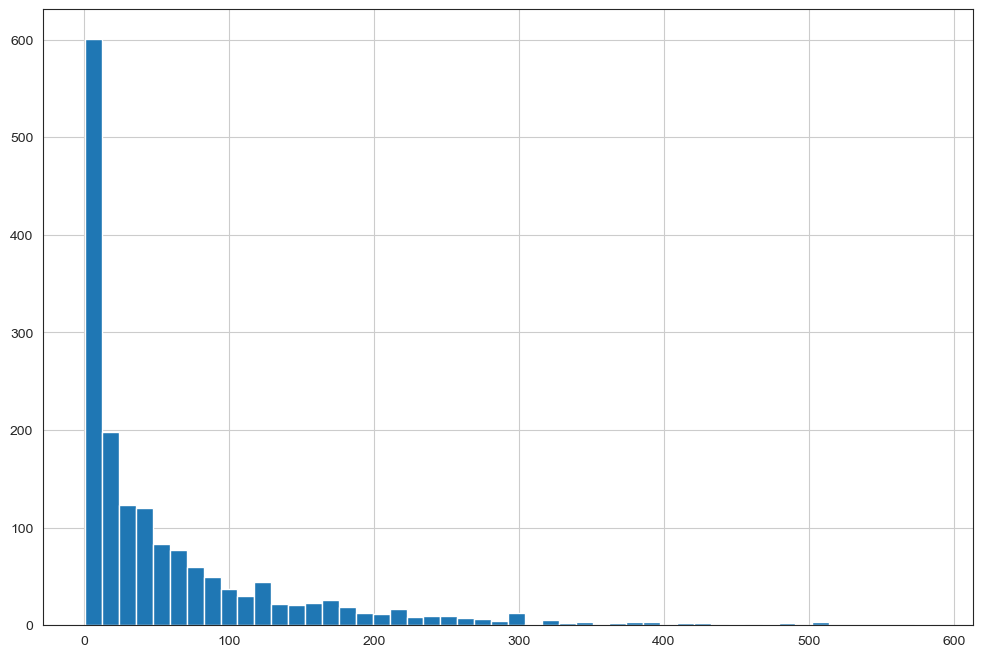

In [18]:
plt.figure(figsize=(12,8))
ratings['ratings_num'].hist(bins=50)

<Axes: >

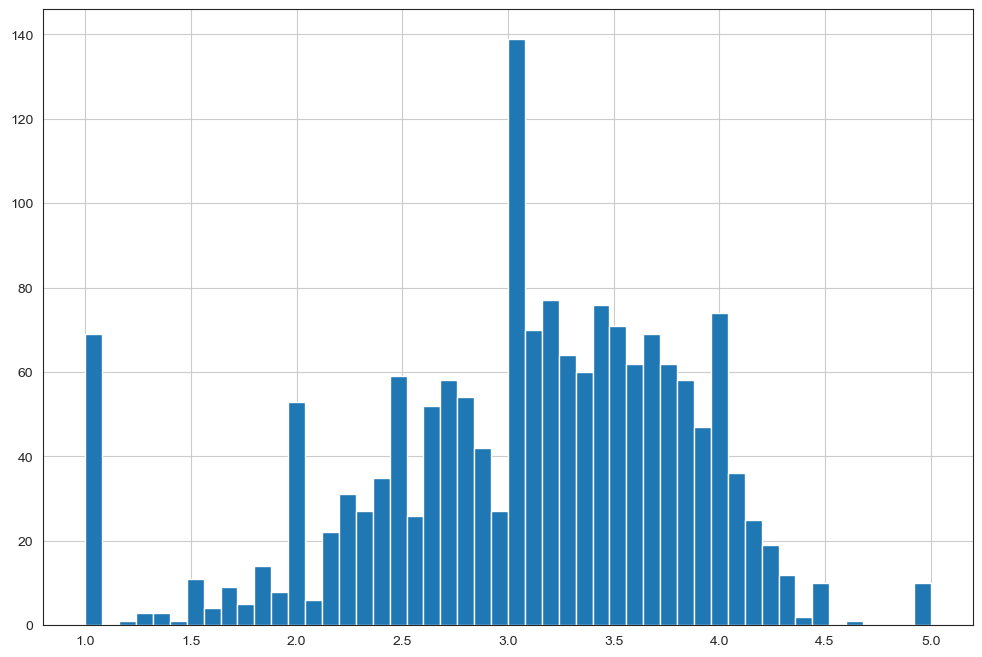

In [19]:
plt.figure(figsize=(12,8))
ratings['rating'].hist(bins=50)

**now I will check distribution or relationship between the actual average rating and the number of ratings**

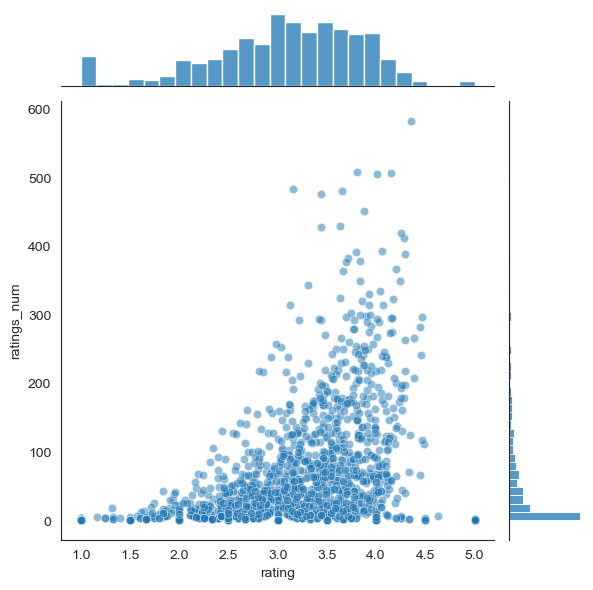

In [20]:
sns.jointplot(x='rating', y='ratings_num', data=ratings, alpha=0.5)

we notice the correlation between ratings and the number of ratings in our dataframe, we will move to create a recommendation system based on item similarity

### Recommending System (Similar Movies)

will create a matrix that has the user ids on one access and the movie title on another axis. 

Each cell will then consist of the rating the user gave to that movie.

**N: Note that there will be a lot of NaN values because most people have not seen most of the movies**

In [21]:
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [22]:
# I will be using a pivot table to get the title of the movie the user id and the rating of the movie. into matrix form

matrix = df.pivot_table(index='user_id', columns='title', values='rating')

In [23]:
# check our matrix 

matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# checking some of the most rated movies 

ratings.sort_values('ratings_num', ascending=False)

,rating,ratings_num
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [25]:
# we will choose 2 movies to find similar recommendations 

starwars_user_ratings = matrix['Star Wars (1977)']
liarliar_user_ratings = matrix['Liar Liar (1997)']

In [26]:
starwars_user_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [27]:
liarliar_user_ratings.head(10)

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
6    2.0
7    1.0
8    3.0
9    4.0
Name: Liar Liar (1997), dtype: float64

NaN values are coming from people who did not watch the movie, so here what we can do is use the .corr with() method, to get a correlation between 2 pandas series

In [28]:
matrix.corrwith (starwars_user_ratings)

# it should return a group of movies that are correlated with the movie we chose 

/Users/alex/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alex/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [29]:
similar_starwars = matrix.corrwith (starwars_user_ratings)

similar_liarliar = matrix.corrwith (liarliar_user_ratings)

/Users/alex/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alex/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/alex/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/alex/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


now I will clean this by removing the null values and then using a data frame instead of a series

In [30]:
corr_starwars = pd.DataFrame(similar_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [31]:
corr_starwars.head()

# correllation column tells us how correlated this movies user ratings were to the userratings of the Star Wars movie.

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


notice that if we sorted the dataframe by correlation, we will get the most similar movies, however, we also get some results that don't really make sense. 

This is because there are a lot of movies watched once by users who also watched star wars (similar cases with popular movies). 

In [32]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


most likely these movies happened to have been seen only by one person who also happened to rate Star Wars five stars.

What I will do is to fix this is filtering out movies that have less than a certain number of reviews so we can set a threshold for the number of ratings necessary in order to be put into our model.

In [33]:
corr_starwars = corr_starwars.join(ratings['ratings_num'])
corr_starwars.head()

,Correlation,ratings_num
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


the reason I used join here instead of merge is because I have the title as the index of my dataframe which makes it a good fit for this join method.

now I will filter out movies that don't have at least 75 number of ratings ratings, to exclude movies watched less times than that number

In [34]:
corr_starwars[corr_starwars['ratings_num']>75].sort_values('Correlation', ascending=False).head(10)

,Correlation,ratings_num
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
Shadowlands (1993),0.332941,78


In [35]:
# since we got a good results let's explore liar liar

corr_liarliar = pd.DataFrame (similar_liarliar, columns=['Correlation'])

In [36]:
corr_liarliar.dropna(inplace=True)

In [37]:
corr_liarliar = corr_liarliar.join(ratings['ratings_num'])

In [38]:
corr_liarliar[corr_liarliar['ratings_num']>75].sort_values('Correlation', ascending=False).head(10)

,Correlation,ratings_num
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Demolition Man (1993),0.442948,92


### - - - - The end - - - -